# embedding

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from plantclef.config import get_device

print(f"PyTorch Version: {torch.__version__}")
device = get_device()
print(f"Using device: {device}")

PyTorch Version: 2.6.0
Using device: mps


In [3]:
import pandas as pd
from pathlib import Path

# Get list of stored filed in cloud bucket
root = Path().resolve().parents[0]
print(root)
! date

/Users/mgustineli/github/pytorch-plantclef
Sat Mar 22 16:18:32 EDT 2025


In [4]:
# path to data
data_path = f"{root}/data/parquet/"
train_path = f"{data_path}/subset_top5_train"
test_path = f"{data_path}/test_2025_pytorch_webinar"

# read train/test data
train_df = pd.read_parquet(train_path)
test_df = pd.read_parquet(test_path)

# display data
print(train_df.shape)
display(train_df.head(3))
display(test_df.head(3))

(3760, 22)


species_id                                    image_name  \
0     1360257  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg   
1     1360257  a6d9a13ec26cbb04d61861ad5cb4ede8eb4d1ea3.jpg   
2     1360257  0fec55fc5105e512df08490ecbb55df3393d85c8.jpg   

                                                path  \
0  /PlantCLEF2024/train/1360257/5a4deafc321f2b653...   
1  /PlantCLEF2024/train/1360257/a6d9a13ec26cbb04d...   
2  /PlantCLEF2024/train/1360257/0fec55fc5105e512d...   

                                                data organ      obs_id  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  bark  1015292920   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  bark  1005087257   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  leaf  4111721487   

                                          license partner         author  \
0                                        cc-by-sa    None   Gabor Graehn   
1                                        cc-by-sa    None  Jacco Sanders   
2  http://creativecommons.org/licenses/by-nc/4.0/    None         imrsmf   

   altitude  ...  gbif_species_id               species     genus      family  \
0       NaN  ...        3039454.0  Frangula alnus Mill.  Frangula  Rhamnaceae   
1      51.0  ...        3039454.0  Frangula alnus Mill.  Frangula  Rhamnaceae   
2       NaN  ...        3039454.0  Frangula alnus Mill.  Frangula  Rhamnaceae   

    dataset    publisher                                         references  \
0  plantnet     plantnet  https://identify.plantnet.org/fr/k-southwester...   
1  plantnet     plantnet  https://identify.plantnet.org/fr/k-southwester...   
2      gbif  iNaturalist       https://www.inaturalist.org/photos/268971946   

                                                 url learn_tag  \
0  https://bs.plantnet.org/image/o/5a4deafc321f2b...     train   
1  https://bs.plantnet.org/image/o/a6d9a13ec26cbb...     train   
2  https://inaturalist-open-data.s3.amazonaws.com...     train   

                                    image_backup_url  
0  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
1  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
2  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  

[3 rows x 22 columns]

image_name  \
0     CBN-PdlC-C4-20180723.jpg   
1  LISAH-BOU-0-30-20230512.jpg   
2     CBN-PdlC-C4-20140811.jpg   

                                                path  \
0  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
1  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
2  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   

                                                data  
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
1  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...

### extract embeddings from single-labe training images

In [5]:
# limit to 5 samples for testing
limit_df = train_df.head(2)
print(f"Limit DF shape: {limit_df.shape}")

Limit DF shape: (2, 22)


In [6]:
from plantclef.embed.workflow import inference_pipeline

# extract embeddings
embeddings, logits = inference_pipeline(
    limit_df,
    batch_size=2,
    use_grid=False,
    cpu_count=1,
)

Extracting embeddings and logits: 100%|██████████| 1/1 [00:03<00:00,  3.61s/batch]


In [7]:
# embeddings shape
embeddings.shape

(2, 768)

In [8]:
# first embedding
embeddings[0][:100]  # showing first 100 values out of 768

array([-0.823913  ,  1.2448792 ,  0.02142336,  0.7411707 ,  0.9784085 ,
        0.8456366 ,  0.9274292 ,  1.3339324 ,  0.41873026,  0.18057367,
        0.5038687 ,  0.3256961 ,  0.5407107 , -1.5314219 ,  0.5564807 ,
        0.34407076, -0.22089823,  1.5678787 , -0.09594131,  0.9991257 ,
        0.8653687 ,  0.7933803 , -0.6965617 , -0.00568593, -0.9326102 ,
        0.66588354, -0.0987655 , -1.6030736 , -0.81897694, -0.7370353 ,
       -0.31676045, -0.33      , -0.00894531, -0.35852385, -0.25947008,
        0.28822127,  1.7787262 ,  0.31940663, -0.33059084,  0.09878837,
        0.12045847,  0.241759  , -0.2484907 ,  0.9968898 ,  0.5101278 ,
        0.27301902,  0.20341328, -0.66387606, -0.81371164,  1.4506068 ,
        0.21478617,  0.62982225,  0.6776942 ,  1.6040286 ,  0.15140952,
       -1.0701761 , -0.56932515, -0.90003705,  1.8172146 ,  1.4147186 ,
        0.68154037, -0.45231098, -0.22335027,  0.34866437,  0.7682708 ,
       -0.07056716, -1.710857  ,  0.7508321 , -1.0289689 ,  0.21

In [9]:
# create embeddings dataframe
cols = ["image_name", "species", "species_id"]
embeddings_df = limit_df[cols].copy()
embeddings_df["embeddings"] = embeddings.tolist()
embeddings_df.head(2)

image_name               species  \
0  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
1  a6d9a13ec26cbb04d61861ad5cb4ede8eb4d1ea3.jpg  Frangula alnus Mill.   

   species_id                                         embeddings  
0     1360257  [-0.8239129781723022, 1.2448792457580566, 0.02...  
1     1360257  [-0.14528648555278778, -0.8409104943275452, -0...

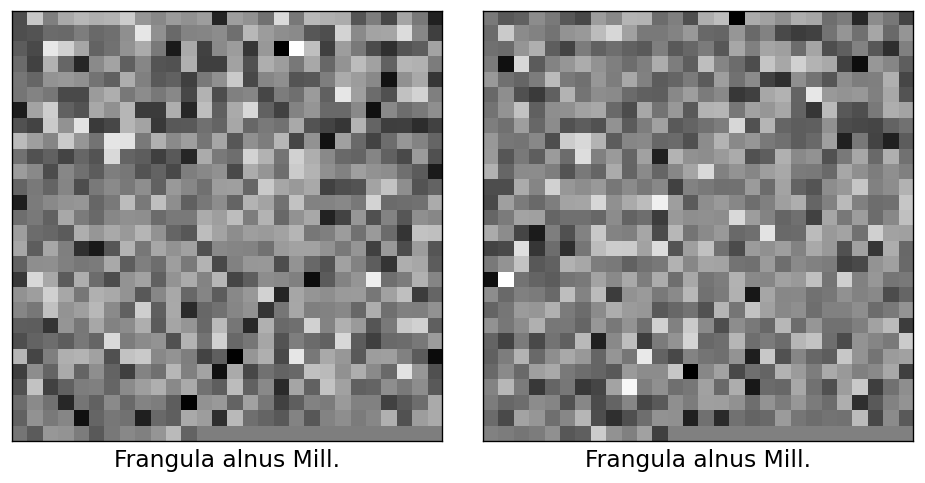

In [10]:
from plantclef.plotting import plot_embeddings

plot_embeddings(
    embeddings_df,
    data_col="embeddings",
    label_col="species",
    grid_size=(1, 2),
    figsize=(8, 4),
    dpi=120,
)

## grid of image tiles

In [11]:
# use grid to extract embeddings for each tile
USE_GRID = True
GRID_SIZE = 3

# extract embeddings
embeddings, logits = inference_pipeline(
    limit_df,
    batch_size=2,
    use_grid=USE_GRID,
    grid_size=GRID_SIZE,
    cpu_count=1,
)

Extracting embeddings and logits: 100%|██████████| 1/1 [00:05<00:00,  5.06s/batch]


In [12]:
# embeddings shape
embeddings.shape

(2, 9, 768)

In [13]:
# create embeddings dataframe
cols = ["image_name", "species", "species_id", "data"]
embeddings_df = limit_df[cols].copy()
embeddings_df["embeddings"] = embeddings.tolist()
embeddings_df.head(2)

image_name               species  \
0  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
1  a6d9a13ec26cbb04d61861ad5cb4ede8eb4d1ea3.jpg  Frangula alnus Mill.   

   species_id                                               data  \
0     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                          embeddings  
0  [[-0.5858309268951416, -0.12548059225082397, 0...  
1  [[-0.017996132373809814, -0.572159469127655, 0...

In [14]:
embeddings_df["embeddings"].apply(lambda x: len(x))

0    9
1    9
Name: embeddings, dtype: int64

In [15]:
# explode embeddings
explode_df = embeddings_df.explode("embeddings", ignore_index=True)
# assign tile number for each image
explode_df["tile"] = explode_df.groupby("image_name").cumcount()
explode_df.head(9)

image_name               species  \
0  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
1  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
2  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
3  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
4  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
5  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
6  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
7  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   
8  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg  Frangula alnus Mill.   

   species_id                                               data  \
0     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
1     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
2     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
3     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
4     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
5     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
6     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
7     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   
8     1360257  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                          embeddings  tile  
0  [-0.5858309268951416, -0.12548059225082397, 0....     0  
1  [-0.4382789731025696, -0.7402980923652649, 0.0...     1  
2  [-0.7559053897857666, 0.8920680284500122, -1.0...     2  
3  [-0.6868499517440796, 0.21441501379013062, -0....     3  
4  [0.031541913747787476, 1.341552734375, -1.0540...     4  
5  [-0.4523531198501587, 0.22192183136940002, -0....     5  
6  [-0.26148784160614014, 1.957824945449829, -0.8...     6  
7  [-1.421854853630066, -0.16190636157989502, -0....     7  
8  [0.026303738355636597, -0.23505020141601562, -...     8

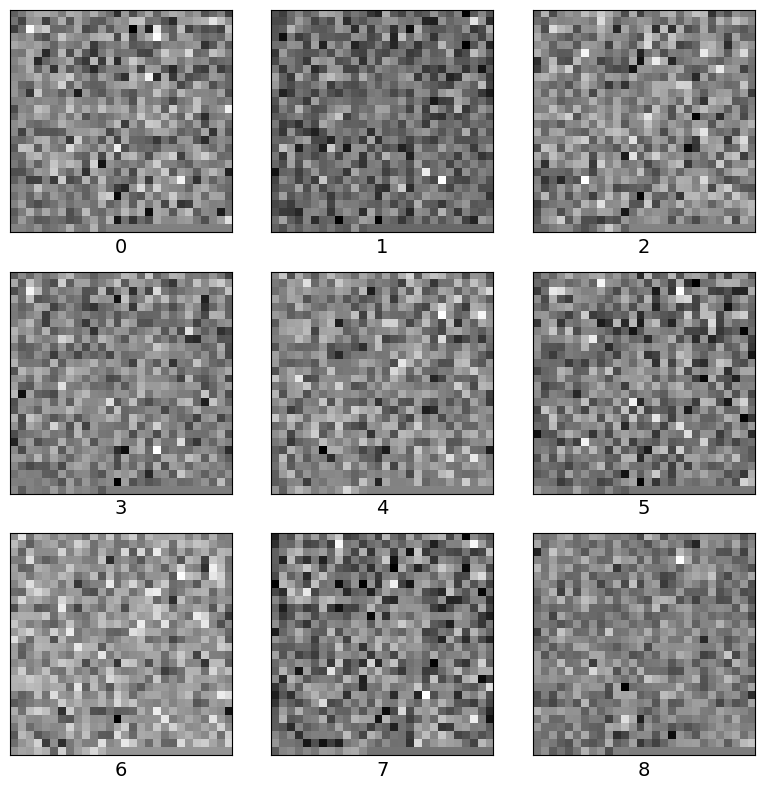

In [16]:
# plot grid embeddings
plot_embeddings(
    explode_df,
    data_col="embeddings",
    label_col="tile",
    grid_size=(3, 3),
    figsize=(8, 8),
)

### PyTorch Lightning

In [17]:
from plantclef.embed.workflow import trainer_pipeline

USE_GRID = True
GRID_SIZE = 3

# select images from test set
image_names = ["CBN-Pyr-03-20230706.jpg", "CBN-can-E6-20230706.jpg"]
test_image_df = test_df[test_df["image_name"].isin(image_names)]

# get embeddings and logits
embeddings, logits = trainer_pipeline(
    test_image_df,
    batch_size=2,
    use_grid=USE_GRID,
    grid_size=GRID_SIZE,
    cpu_count=1,
    top_k=5,
)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/mgustineli/github/pytorch-plantclef/venv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [18]:
# embeddings shape
embeddings.shape  # (200, 9, 768)

torch.Size([2, 9, 768])

In [19]:
# create embeddings dataframe
def explode_embeddings_logits(
    df: pd.DataFrame,
    embeddings: torch.Tensor,
    logits: list,
) -> pd.DataFrame:
    # create dataframe
    cols = ["image_name", "data"]
    pred_df = df[cols].copy()
    pred_df["embeddings"] = embeddings.tolist()
    pred_df["logits"] = logits
    # explode embeddings
    explode_df = pred_df.explode(["embeddings", "logits"], ignore_index=True)
    # assign tile number for each image
    explode_df["tile"] = explode_df.groupby("image_name").cumcount()
    return explode_df

In [20]:
explode_df = explode_embeddings_logits(test_image_df, embeddings, logits)

In [21]:
explode_df.head(9)

image_name                                               data  \
0  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
1  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
2  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
3  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
4  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
5  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
6  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
7  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   
8  CBN-Pyr-03-20230706.jpg  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...   

                                          embeddings  \
0  [2.5109221935272217, -0.46886831521987915, -0....   
1  [0.4602768123149872, 0.5199960470199585, -0.21...   
2  [0.8263758420944214, 0.855131983757019, -1.082...   
3  [2.3111977577209473, 0.287236750125885, 0.8441...   
4  [1.01568603515625, 0.1487639844417572, 0.57687...   
5  [0.5194851160049438, -0.04226940870285034, 0.2...   
6  [0.5967509746551514, -0.487720787525177, 0.167...   
7  [0.029867023229599, 0.7805190682411194, -0.663...   
8  [1.4826017618179321, 0.6403757929801941, 0.029...   

                                              logits  tile  
0  {'1580587': 0.08392123132944107, '1392323': 0....     0  
1  {'1396784': 0.16168425977230072, '1397512': 0....     1  
2  {'1396015': 0.09582242369651794, '1395973': 0....     2  
3  {'1651363': 0.2529003918170929, '1361281': 0.1...     3  
4  {'1741624': 0.5019134879112244, '1580587': 0.3...     4  
5  {'1741624': 0.20808552205562592, '1580587': 0....     5  
6  {'1741624': 0.2158067375421524, '1580587': 0.1...     6  
7  {'1741624': 0.2340453416109085, '1580587': 0.0...     7  
8  {'1741624': 0.24523599445819855, '1580587': 0....     8

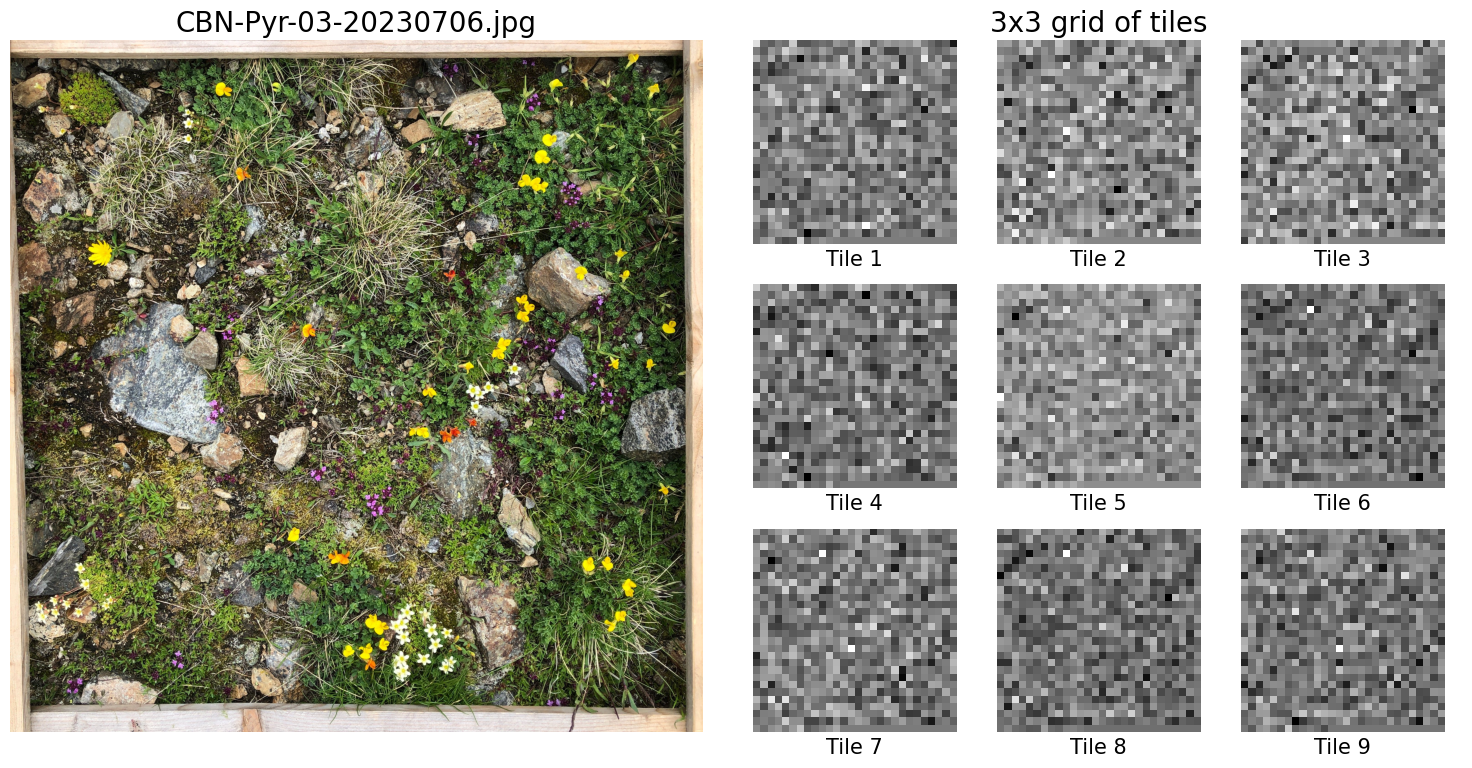

In [22]:
from plantclef.plotting import plot_embed_tiles

plot_embed_tiles(
    explode_df,
    data_col="embeddings",
    grid_size=3,
)

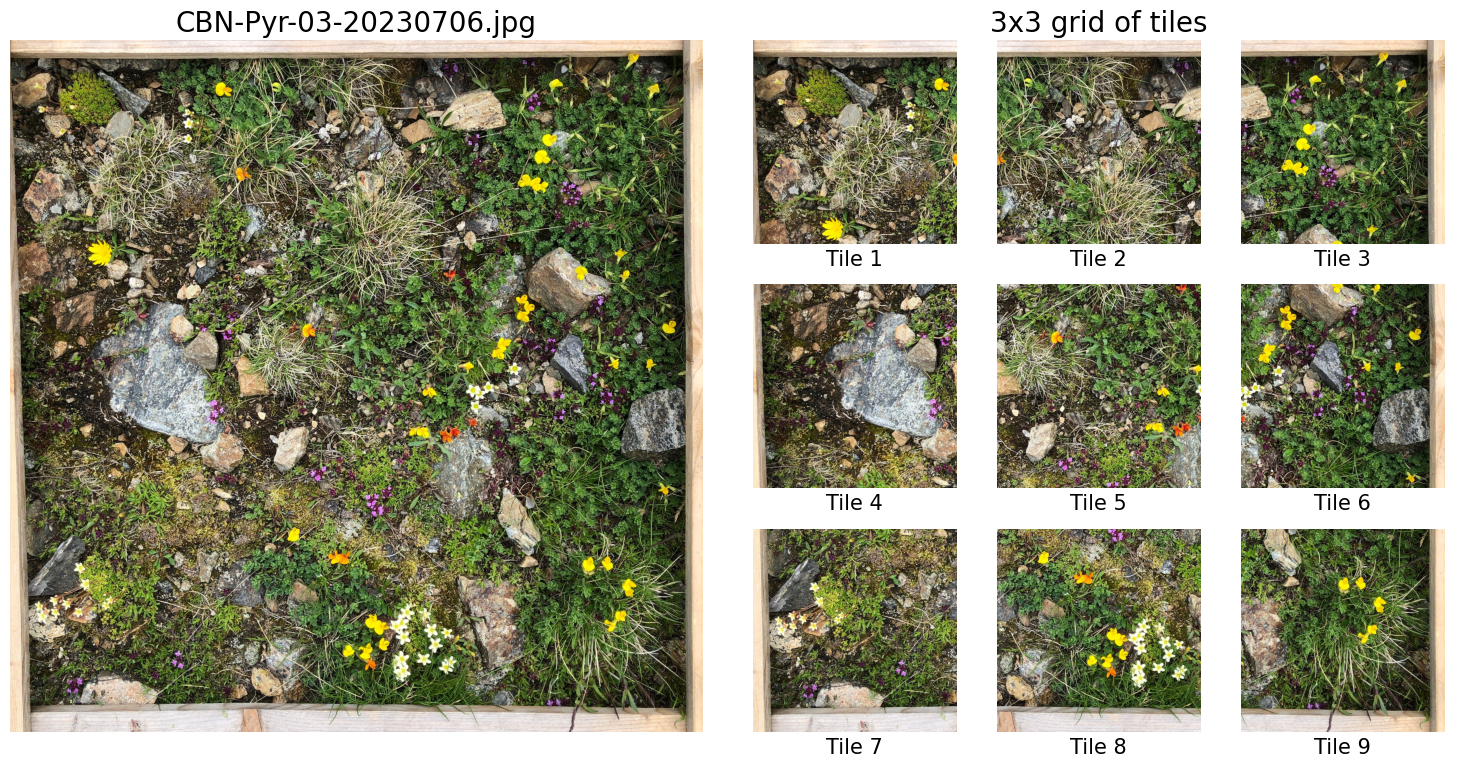

In [23]:
from plantclef.plotting import plot_image_tiles

# show image tiles
plot_image_tiles(
    explode_df,
    data_col="data",
    grid_size=3,
)

### logits of the classifier

In [24]:
print(f"Length logits: {len(logits)}")

Length logits: 2


In [25]:
# display logits of first tile
explode_df["logits"].iloc[1]

{'1396784': 0.16168425977230072,
 '1397512': 0.12157241255044937,
 '1390074': 0.036184586584568024,
 '1397208': 0.033299293369054794,
 '1398690': 0.024579515680670738}

In [26]:
# display logits for each tile
for i in range(9):
    logits = explode_df["logits"].iloc[i]
    logits_formatted = {k: round(v, 3) for k, v in logits.items()}
    print(f"Tile {i}: {logits_formatted}")

Tile 0: {'1580587': 0.084, '1392323': 0.054, '1741624': 0.035, '1580588': 0.033, '1519650': 0.033}
Tile 1: {'1396784': 0.162, '1397512': 0.122, '1390074': 0.036, '1397208': 0.033, '1398690': 0.025}
Tile 2: {'1396015': 0.096, '1395973': 0.053, '1395945': 0.035, '1362192': 0.033, '1395949': 0.025}
Tile 3: {'1651363': 0.253, '1361281': 0.131, '1392323': 0.129, '1580587': 0.06, '1361372': 0.022}
Tile 4: {'1741624': 0.502, '1580587': 0.312, '1394282': 0.016, '1580588': 0.01, '1412585': 0.005}
Tile 5: {'1741624': 0.208, '1580587': 0.105, '1396784': 0.059, '1397208': 0.031, '1397512': 0.03}
Tile 6: {'1741624': 0.216, '1580587': 0.145, '1397512': 0.074, '1580630': 0.025, '1580588': 0.025}
Tile 7: {'1741624': 0.234, '1580587': 0.091, '1396023': 0.046, '1397512': 0.033, '1412585': 0.031}
Tile 8: {'1741624': 0.245, '1580587': 0.217, '1580588': 0.053, '1697232': 0.012, '1697332': 0.01}


## embed entire test set

In [ ]:
# params
USE_GRID = True
GRID_SIZE = 3
CPU_COUNT = 1

# get embeddings and logits
full_embeddings, full_logits = trainer_pipeline(
    test_df,
    batch_size=10,  # 10 imamges per batch
    use_grid=USE_GRID,
    grid_size=GRID_SIZE,
    cpu_count=CPU_COUNT,
    top_k=5,
)

In [ ]:
# explode full embeddings and logits
full_explode_df = explode_embeddings_logits(
    test_df,
    full_embeddings,
    full_logits,
)